In [1]:
# Se importa la libreria a usar
import pandas as pd

In [2]:
# Se crea un dataframe para cargar el archivo .xlsx
libro = pd.read_excel('homicidios.xlsx', sheet_name=None)

In [3]:
# Para conocer cuantas hojas tiene el archivo procedemos a imprimirlas

nombre_de_hojas = list(libro.keys())
print(f'Los nombre de la hojas en el archivo de excel son: {nombre_de_hojas}')

Los nombre de la hojas en el archivo de excel son: ['HECHOS', 'DICCIONARIO_HECHOS', 'VICTIMAS', 'DICCIONARIO_VICTIMAS', 'clas']


In [4]:
# Creamos el Dataframe hechos con la hoja Hechos del archivo .xlsx
hechos = libro['HECHOS']

In [5]:
hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


#### Una vez revisado el contenido del libro Hechos se procede a ver si existen duplicados en la columna ID

In [6]:
hechos['ID'].duplicated().sum()

0

#### Se crea el Dataframe victimas para conocer su contenido

In [7]:
victimas = libro['VICTIMAS']

In [8]:
victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [9]:
# se verifican que columnas y de que tipo son sus datos 
victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [ ]:
duplicados = victimas[victimas['ID_hecho'].duplicated()]
duplicados

##### Se verifca la existencia de estas filas duplicadas y es logica ya que un hecho puede tener varias victimas

## Se procede a definir a victimas con las columnas que ncesitamos para unir al dataframe de Hechos

In [10]:
victimas = victimas[['ID_hecho','ROL','SEXO','EDAD','FECHA_FALLECIMIENTO']]

In [11]:
victimas.rename(columns={'ID_hecho': 'ID'}, inplace=True)

C:\Users\felix\AppData\Local\Temp\ipykernel_28412\654063845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victimas.rename(columns={'ID_hecho': 'ID'}, inplace=True)


In [12]:
merge_datos = pd.merge(victimas,hechos, on='ID',how='left')

In [13]:
merge_datos

,ID,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,N_VICTIMAS,FECHA,AAAA,MM,DD,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00,1,2016-01-01,2016,1,1,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00,1,2016-01-02,2016,1,2,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00,1,2016-01-03,2016,1,3,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,CONDUCTOR,MASCULINO,18,SD,1,2016-01-10,2016,1,10,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00,1,2016-01-21,2016,1,21,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50,2021-12-12 00:00:00,1,2021-12-12,2021,12,12,...,NaN,PUEYRREDON AV.,RIVADAVIA AV. y PUEYRREDON AV.,3,Point (105258.35368554 102122.93231400),-58.40596860,-34.61011987,PEATON-AUTO,PEATON,AUTO
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18 00:00:00,1,2021-12-13,2021,12,13,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20 00:00:00,1,2021-12-20,2021,12,20,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
715,2021-0095,CONDUCTOR,MASCULINO,27,2022-01-02 00:00:00,1,2021-12-30,2021,12,30,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS


In [14]:
duplicados = merge_datos[merge_datos['ID'].duplicated()]
duplicados

,ID,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,N_VICTIMAS,FECHA,AAAA,MM,DD,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
30,2016-0041,PASAJERO_ACOMPAÑANTE,MASCULINO,SD,2016-03-30 00:00:00,2,2016-03-29,2016,3,29,...,NaN,RIVERA INDARTE AV.,DIRECTORIO AV. y RIVERA INDARTE AV.,7,Point (100232.38564985 99530.25843190),-58.46076550,-34.63350444,MOTO-CARGAS,MOTO,CARGAS
99,2016-0126,PASAJERO_ACOMPAÑANTE,MASCULINO,60,SD,2,2016-09-18,2016,9,18,...,NaN,TINOGASTA,IRIGOYEN y TINOGASTA,10,Point (94275.54271123 100886.87954649),-58.52572109,-34.62125906,AUTO-CARGAS,AUTO,CARGAS
164,2017-0026,CONDUCTOR,MASCULINO,19,2017-02-26 00:00:00,2,2017-02-26,2017,2,26,...,NaN,FOURNIER,"MORENO, PERITO AV. y FOURNIER",4,Point (104113.67806500 97722.68219304),-58.41842777,-34.64979057,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO
174,2017-0035,PASAJERO_ACOMPAÑANTE,MASCULINO,32,2017-03-23 00:00:00,3,2017-03-23,2017,3,23,...,NaN,"VILLAFLOR, AZUCENA","ACHAVAL RODRIGUEZ, T., DR. AV. y VILLAFLOR, AZ...",1,Point (109583.11620052 102006.72069921),-58.35881506,-34.61113641,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO
175,2017-0035,PASAJERO_ACOMPAÑANTE,MASCULINO,30,2017-03-23 00:00:00,3,2017-03-23,2017,3,23,...,NaN,"VILLAFLOR, AZUCENA","ACHAVAL RODRIGUEZ, T., DR. AV. y VILLAFLOR, AZ...",1,Point (109583.11620052 102006.72069921),-58.35881506,-34.61113641,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO
177,2017-0036,CONDUCTOR,MASCULINO,20,2017-03-29 00:00:00,2,2017-03-29,2017,3,29,...,NaN,CAMPANA,"PAZ, GRAL. AV. y CAMPANA",12,Point (95300.18060161 105287.23850698),-58.51452347,-34.58159762,MOTO-PASAJEROS,MOTO,PASAJEROS
187,2017-0050,PASAJERO_ACOMPAÑANTE,MASCULINO,16,2017-04-28 00:00:00,2,2017-04-28,2017,4,28,...,NaN,NaN,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
238,2017-0108,PASAJERO_ACOMPAÑANTE,MASCULINO,10,2017-09-02 00:00:00,2,2017-09-02,2017,9,2,...,NaN,MACHAIN,"PAZ, GRAL. AV. y MACHAIN",12,Point (97098.48468623 109019.96106626),-58.49491054,-34.54795581,AUTO-OBJETO FIJO,OBJETO FIJO,AUTO
243,2017-0112,PASAJERO_ACOMPAÑANTE,MASCULINO,SD,2017-09-13 00:00:00,2,2017-09-10,2017,9,10,...,NaN,NaN,AUTOPISTA 25 DE MAYO y VARELA AV.,7,Point (100479.14412395 98812.52258620),-58.45807401,-34.63997430,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO
254,2017-0126,CONDUCTOR,MASCULINO,36,2017-10-14 00:00:00,2,2017-10-14,2017,10,14,...,NaN,CA?ADA DE GOMEZ,RIESTRA AV. y CAÃ‘ADA DE GOMEZ,8,Point (98466.20276785 94207.42419155),-58.48003734,-34.68148508,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO


##### Se verifican que existan la misma cantidad de duplidos en el dataframe


In [15]:
# Se comprueba uno de los Id a ver que informacion contiene 

duplicado_1 = merge_datos[merge_datos['ID']== '2017-0035']
duplicado_1

,ID,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,N_VICTIMAS,FECHA,AAAA,MM,DD,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
173,2017-0035,CONDUCTOR,MASCULINO,28,2017-03-23 00:00:00,3,2017-03-23,2017,3,23,...,NaN,"VILLAFLOR, AZUCENA","ACHAVAL RODRIGUEZ, T., DR. AV. y VILLAFLOR, AZ...",1,Point (109583.11620052 102006.72069921),-58.35881506,-34.61113641,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO
174,2017-0035,PASAJERO_ACOMPAÑANTE,MASCULINO,32,2017-03-23 00:00:00,3,2017-03-23,2017,3,23,...,NaN,"VILLAFLOR, AZUCENA","ACHAVAL RODRIGUEZ, T., DR. AV. y VILLAFLOR, AZ...",1,Point (109583.11620052 102006.72069921),-58.35881506,-34.61113641,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO
175,2017-0035,PASAJERO_ACOMPAÑANTE,MASCULINO,30,2017-03-23 00:00:00,3,2017-03-23,2017,3,23,...,NaN,"VILLAFLOR, AZUCENA","ACHAVAL RODRIGUEZ, T., DR. AV. y VILLAFLOR, AZ...",1,Point (109583.11620052 102006.72069921),-58.35881506,-34.61113641,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO


In [16]:
merge_datos.columns

Index(['ID', 'ROL', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO', 'N_VICTIMAS',
       'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH', 'LUGAR_DEL_HECHO',
       'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce', 'Dirección Normalizada',
       'COMUNA', 'XY (CABA)', 'pos x', 'pos y', 'PARTICIPANTES', 'VICTIMA',
       'ACUSADO'],
      dtype='object')

In [17]:
# se procede a normalizar los nombre de las columnas en munisculas
merge_datos.columns = merge_datos.columns.str.lower()

In [18]:
merge_datos.columns

Index(['id', 'rol', 'sexo', 'edad', 'fecha_fallecimiento', 'n_victimas',
       'fecha', 'aaaa', 'mm', 'dd', 'hora', 'hh', 'lugar_del_hecho',
       'tipo_de_calle', 'calle', 'altura', 'cruce', 'dirección normalizada',
       'comuna', 'xy (caba)', 'pos x', 'pos y', 'participantes', 'victima',
       'acusado'],
      dtype='object')

## Se Crea un CSV con los datos unidos

In [19]:
merge_datos.to_csv('merge_data.csv', index=False)

In [20]:
import pandas as pd

In [21]:
datos = pd.read_csv('merge_data.csv',encoding='utf-8')

## Se comienza a hacer un trabajo de Limpieza y transformacion de los datos

In [22]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     717 non-null    object 
 1   rol                    717 non-null    object 
 2   sexo                   717 non-null    object 
 3   edad                   717 non-null    object 
 4   fecha_fallecimiento    717 non-null    object 
 5   n_victimas             717 non-null    int64  
 6   fecha                  717 non-null    object 
 7   aaaa                   717 non-null    int64  
 8   mm                     717 non-null    int64  
 9   dd                     717 non-null    int64  
 10  hora                   717 non-null    object 
 11  hh                     717 non-null    object 
 12  lugar_del_hecho        717 non-null    object 
 13  tipo_de_calle          717 non-null    object 
 14  calle                  716 non-null    object 
 15  altura

##### Empecemos a eliminar las columnas que no necesitamos

In [23]:
datos.iloc[:,:11]

,id,rol,sexo,edad,fecha_fallecimiento,n_victimas,fecha,aaaa,mm,dd,hora
0,2016-0001,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00,1,2016-01-01,2016,1,1,04:00:00
1,2016-0002,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00,1,2016-01-02,2016,1,2,01:15:00
2,2016-0003,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00,1,2016-01-03,2016,1,3,07:00:00
3,2016-0004,CONDUCTOR,MASCULINO,18,SD,1,2016-01-10,2016,1,10,00:00:00
4,2016-0005,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00,1,2016-01-21,2016,1,21,05:20:00
...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50,2021-12-12 00:00:00,1,2021-12-12,2021,12,12,06:20:00
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18 00:00:00,1,2021-12-13,2021,12,13,17:10:00
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20 00:00:00,1,2021-12-20,2021,12,20,01:10:00
715,2021-0095,CONDUCTOR,MASCULINO,27,2022-01-02 00:00:00,1,2021-12-30,2021,12,30,00:43:00


In [24]:
datos[datos['fecha_fallecimiento']=='SD']

,id,rol,sexo,edad,fecha_fallecimiento,n_victimas,fecha,aaaa,mm,dd,...,altura,cruce,dirección normalizada,comuna,xy (caba),pos x,pos y,participantes,victima,acusado
3,2016-0004,CONDUCTOR,MASCULINO,18,SD,1,2016-01-10,2016,1,10,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
16,2016-0022,PASAJERO_ACOMPAÑANTE,MASCULINO,41,SD,1,2016-02-21,2016,2,21,...,NaN,"ALSINA, ADOLFO","9 DE JULIO AV. y ALSINA, ADOLFO",1,Point (107507.39502374 102046.08333077),-58.38144696,-34.61079875,MOTO-AUTO,MOTO,AUTO
19,2016-0027,PASAJERO_ACOMPAÑANTE,MASCULINO,34,SD,1,2016-02-28,2016,2,28,...,NaN,"DIAZ, AVELINO","CURAPALIGUE AV. y DIAZ, AVELINO",7,Point (101679.82794245 98973.02976850),-58.44497874,-34.63852623,AUTO-AUTO,AUTO,AUTO
22,2016-0031,CONDUCTOR,MASCULINO,21,SD,1,2016-03-08,2016,3,8,...,NaN,"ROCA, CNEL. AV.","PAZ, GRAL. AV. y ROCA, CNEL. AV.",8,Point (99327.01838497 92326.91130631),-58.47064556,-34.69843756,MOTO-PASAJEROS,MOTO,PASAJEROS
33,2016-0045,CONDUCTOR,MASCULINO,SD,SD,1,2016-04-11,2016,4,11,...,NaN,DEL LIBERTADOR AV.,"PAZ, GRAL. AV. y DEL LIBERTADOR AV.",13,Point (99620.34936816 110483.29286598),-58.46743471,-34.53476874,MOTO-SD,MOTO,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,2017-0089,SD,MASCULINO,23,SD,1,2017-07-13,2017,7,13,...,901.0,NaN,"LEGUIZAMON, MARTINIANO 901",9,Point (95246.78684010 97935.32361317),-58.51514709,-34.64787051,SD-AUTO,SD,AUTO
242,2017-0112,PASAJERO_ACOMPAÑANTE,MASCULINO,1,SD,2,2017-09-10,2017,9,10,...,NaN,NaN,AUTOPISTA 25 DE MAYO y VARELA AV.,7,Point (100479.14412395 98812.52258620),-58.45807401,-34.63997430,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO
246,2017-0115,CONDUCTOR,MASCULINO,34,SD,1,2017-09-19,2017,9,19,...,NaN,TREINTA Y TRES ORIENTALES,PAVON AV. y TREINTA Y TRES ORIENTALES,5,Point (103803.42869640 99818.79654291),-58.42182126,-34.63089661,MOTO-BICICLETA,MOTO,BICICLETA
253,2017-0126,PASAJERO_ACOMPAÑANTE,MASCULINO,39,SD,2,2017-10-14,2017,10,14,...,NaN,CA?ADA DE GOMEZ,RIESTRA AV. y CAÃ‘ADA DE GOMEZ,8,Point (98466.20276785 94207.42419155),-58.48003734,-34.68148508,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO


In [25]:
datos['rol'].value_counts()

CONDUCTOR               330
PEATON                  267
PASAJERO_ACOMPAÑANTE     80
CICLISTA                 29
SD                       11
Name: rol, dtype: int64

Como existen datos faltantes en la columna de rol procedemos a imputar dichas celdas por la moda

In [26]:
moda= datos['rol'].mode()[0]
moda

'CONDUCTOR'

In [27]:
datos['rol'] = datos['rol'].replace('SD',moda)

In [28]:
datos['rol'].value_counts()

CONDUCTOR               341
PEATON                  267
PASAJERO_ACOMPAÑANTE     80
CICLISTA                 29
Name: rol, dtype: int64

Como existen datos faltantes en la columna de sexo procedemos a imputar dichas celdas por la moda

In [29]:
datos['sexo'].value_counts()

MASCULINO    545
FEMENINO     166
SD             6
Name: sexo, dtype: int64

In [30]:
moda= datos['sexo'].mode()[0]
moda

'MASCULINO'

In [31]:
datos['sexo'] = datos['sexo'].replace('SD',moda)

In [32]:
datos['sexo'].value_counts()

MASCULINO    551
FEMENINO     166
Name: sexo, dtype: int64

In [33]:
datos['edad'].value_counts()

SD    53
30    28
29    24
23    24
27    20
      ..
11     1
13     1
85     1
7      1
88     1
Name: edad, Length: 86, dtype: int64

Como podemos ver existen 53 datos faltantes, analizaremos la columna a ver por cual valor se puede imputar

In [34]:
import numpy as np

datos['edad'] = datos['edad'].str.replace('SD', str(np.nan))

In [36]:
# Convierte la columna 'edad' en números, reemplazando 'NaN' con valores NaN
datos['edad'] = pd.to_numeric(datos['edad'], errors='coerce')

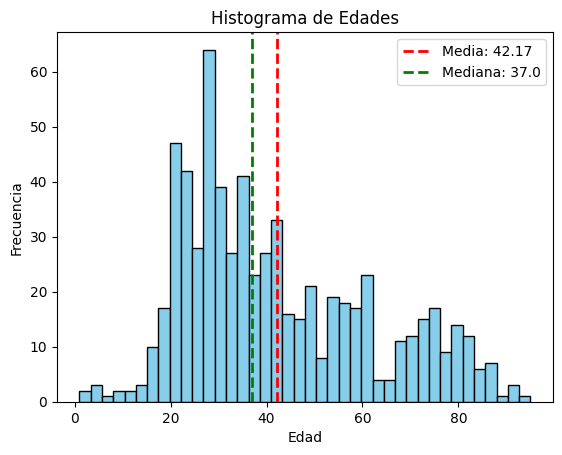

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'datos' con una columna 'edad'

# Grafica un histograma de la columna 'edad'
plt.hist(datos['edad'], bins=40, color='skyblue', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades')

# Calcula la media y la mediana de la columna 'edad'
media_edad = datos['edad'].mean()
mediana_edad = datos['edad'].median()

# Agrega líneas verticales para mostrar la media y la mediana
plt.axvline(media_edad, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_edad:.2f}')
plt.axvline(mediana_edad, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana_edad}')

# Muestra una leyenda con las etiquetas de la media y la mediana
plt.legend()

plt.show()

Como los datos no se ven tan simetricos, preferiremos imputar los valores faltantes por la mediana al parecer hay datos muy alejados de la media (outliers)

In [38]:
media = datos['edad'].mean().round(2)
media

42.17

In [39]:
mediana = datos['edad'].median().round(2)
mediana

37.0

In [40]:
# Reemplaza los valores NaN por la mediana en la columna 'edad'
datos['edad'].fillna(mediana, inplace=True)

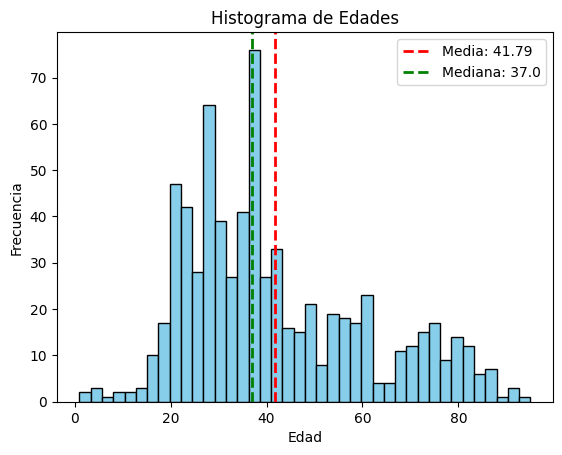

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'datos' con una columna 'edad'

# Grafica un histograma de la columna 'edad'
plt.hist(datos['edad'], bins=40, color='skyblue', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades')

# Calcula la media y la mediana de la columna 'edad'
media_edad = datos['edad'].mean()
mediana_edad = datos['edad'].median()

# Agrega líneas verticales para mostrar la media y la mediana
plt.axvline(media_edad, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_edad:.2f}')
plt.axvline(mediana_edad, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana_edad}')

# Muestra una leyenda con las etiquetas de la media y la mediana
plt.legend()

plt.show()

Procedemos con la columna que continua 'fecha_fallecimiento'

In [42]:
datos['fecha_fallecimiento']

0      2016-01-01 00:00:00
1      2016-01-02 00:00:00
2      2016-01-03 00:00:00
3                       SD
4      2016-02-01 00:00:00
              ...         
712    2021-12-12 00:00:00
713    2021-12-18 00:00:00
714    2021-12-20 00:00:00
715    2022-01-02 00:00:00
716    2021-12-20 00:00:00
Name: fecha_fallecimiento, Length: 717, dtype: object

In [43]:
datos[datos['fecha_fallecimiento']=='SD']

,id,rol,sexo,edad,fecha_fallecimiento,n_victimas,fecha,aaaa,mm,dd,...,altura,cruce,dirección normalizada,comuna,xy (caba),pos x,pos y,participantes,victima,acusado
3,2016-0004,CONDUCTOR,MASCULINO,18.0,SD,1,2016-01-10,2016,1,10,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
16,2016-0022,PASAJERO_ACOMPAÑANTE,MASCULINO,41.0,SD,1,2016-02-21,2016,2,21,...,NaN,"ALSINA, ADOLFO","9 DE JULIO AV. y ALSINA, ADOLFO",1,Point (107507.39502374 102046.08333077),-58.38144696,-34.61079875,MOTO-AUTO,MOTO,AUTO
19,2016-0027,PASAJERO_ACOMPAÑANTE,MASCULINO,34.0,SD,1,2016-02-28,2016,2,28,...,NaN,"DIAZ, AVELINO","CURAPALIGUE AV. y DIAZ, AVELINO",7,Point (101679.82794245 98973.02976850),-58.44497874,-34.63852623,AUTO-AUTO,AUTO,AUTO
22,2016-0031,CONDUCTOR,MASCULINO,21.0,SD,1,2016-03-08,2016,3,8,...,NaN,"ROCA, CNEL. AV.","PAZ, GRAL. AV. y ROCA, CNEL. AV.",8,Point (99327.01838497 92326.91130631),-58.47064556,-34.69843756,MOTO-PASAJEROS,MOTO,PASAJEROS
33,2016-0045,CONDUCTOR,MASCULINO,37.0,SD,1,2016-04-11,2016,4,11,...,NaN,DEL LIBERTADOR AV.,"PAZ, GRAL. AV. y DEL LIBERTADOR AV.",13,Point (99620.34936816 110483.29286598),-58.46743471,-34.53476874,MOTO-SD,MOTO,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,2017-0089,CONDUCTOR,MASCULINO,23.0,SD,1,2017-07-13,2017,7,13,...,901.0,NaN,"LEGUIZAMON, MARTINIANO 901",9,Point (95246.78684010 97935.32361317),-58.51514709,-34.64787051,SD-AUTO,SD,AUTO
242,2017-0112,PASAJERO_ACOMPAÑANTE,MASCULINO,1.0,SD,2,2017-09-10,2017,9,10,...,NaN,NaN,AUTOPISTA 25 DE MAYO y VARELA AV.,7,Point (100479.14412395 98812.52258620),-58.45807401,-34.63997430,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO
246,2017-0115,CONDUCTOR,MASCULINO,34.0,SD,1,2017-09-19,2017,9,19,...,NaN,TREINTA Y TRES ORIENTALES,PAVON AV. y TREINTA Y TRES ORIENTALES,5,Point (103803.42869640 99818.79654291),-58.42182126,-34.63089661,MOTO-BICICLETA,MOTO,BICICLETA
253,2017-0126,PASAJERO_ACOMPAÑANTE,MASCULINO,39.0,SD,2,2017-10-14,2017,10,14,...,NaN,CA?ADA DE GOMEZ,RIESTRA AV. y CAÃ‘ADA DE GOMEZ,8,Point (98466.20276785 94207.42419155),-58.48003734,-34.68148508,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO


Procedemos a imputar la fecha de fallecimiento con la fecha del Hecho

In [44]:
# Reemplaza "SD" en 'fecha_fallecimiento' con los valores de 'fecha'
datos.loc[datos['fecha_fallecimiento'] == 'SD', 'fecha_fallecimiento'] = datos['fecha']

In [45]:
datos[datos['id']=='2016-0027']

,id,rol,sexo,edad,fecha_fallecimiento,n_victimas,fecha,aaaa,mm,dd,...,altura,cruce,dirección normalizada,comuna,xy (caba),pos x,pos y,participantes,victima,acusado
19,2016-0027,PASAJERO_ACOMPAÑANTE,MASCULINO,34.0,2016-02-28,1,2016-02-28,2016,2,28,...,NaN,"DIAZ, AVELINO","CURAPALIGUE AV. y DIAZ, AVELINO",7,Point (101679.82794245 98973.02976850),-58.44497874,-34.63852623,AUTO-AUTO,AUTO,AUTO


Cambiamos el formato de la columna 

In [ ]:
datos['fecha_fallecimiento'] = pd.to_datetime(datos['fecha_fallecimiento'])

Revisamos la columna numero de victima

In [46]:
datos['n_victimas'].value_counts()

1    676
2     38
3      3
Name: n_victimas, dtype: int64

Se puede apreciar que no existen valores fuera de lo normal, por lo que no se realiza ninguna transformacion

Se contina con la columna de Fecha

In [47]:
datos['fecha'].isna().sum()

0

In [ ]:
datos[datos['fecha']=='SD']

In [48]:
datos = datos.rename(columns={'fecha':'fecha_hecho'})

Se contina con la columna de hora

In [50]:
datos['hora']

0      04:00:00
1      01:15:00
2      07:00:00
3      00:00:00
4      05:20:00
         ...   
712    06:20:00
713    17:10:00
714    01:10:00
715    00:43:00
716    10:30:00
Name: hora, Length: 717, dtype: object

In [51]:
datos[datos['hora']=='SD']

,id,rol,sexo,edad,fecha_fallecimiento,n_victimas,fecha_hecho,aaaa,mm,dd,...,altura,cruce,dirección normalizada,comuna,xy (caba),pos x,pos y,participantes,victima,acusado
537,2019-0103,CONDUCTOR,MASCULINO,24.0,2019-12-18 00:00:00,1,2019-12-18,2019,12,18,...,NaN,GRIVEO,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


Com existe un index con la hora en SD la imputamos por la hora 00:00:00

In [52]:
datos['hora'] = datos['hora'].replace('SD','00:00:00')

In [53]:
datos.iloc[:,12:19]

,lugar_del_hecho,tipo_de_calle,calle,altura,cruce,dirección normalizada,comuna
0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8
1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9
2,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,ENTRE RIOS AV. 2034,1
3,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8
4,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1
...,...,...,...,...,...,...,...
712,AV. RIVADAVIA Y AV. PUEYRREDON,AVENIDA,RIVADAVIA AV.,NaN,PUEYRREDON AV.,RIVADAVIA AV. y PUEYRREDON AV.,3
713,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,NaN,MOM,RIESTRA AV. y MOM,7
714,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9
715,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,NaN,TERRADA,GAONA AV. y TERRADA,11


In [54]:
datos[datos['lugar_del_hecho']=='SD']

,id,rol,sexo,edad,fecha_fallecimiento,n_victimas,fecha_hecho,aaaa,mm,dd,...,altura,cruce,dirección normalizada,comuna,xy (caba),pos x,pos y,participantes,victima,acusado
121,2016-0151,PEATON,MASCULINO,37.0,2016-11-18,1,2016-11-18,2016,11,18,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD


In [55]:
datos['tipo_de_calle'].value_counts()

AVENIDA      442
CALLE        138
GRAL PAZ      69
AUTOPISTA     68
Name: tipo_de_calle, dtype: int64

Revisando el comportamiento de las direcciones que faltan no podemos eliminar las filas ya que contienen informacionque nos puede ser de utilidad para el EDA

In [56]:
datos[datos['lugar_del_hecho']=='SD']

,id,rol,sexo,edad,fecha_fallecimiento,n_victimas,fecha_hecho,aaaa,mm,dd,...,altura,cruce,dirección normalizada,comuna,xy (caba),pos x,pos y,participantes,victima,acusado
121,2016-0151,PEATON,MASCULINO,37.0,2016-11-18,1,2016-11-18,2016,11,18,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD


In [57]:
datos[datos['xy (caba)']=='Point (. .)']

,id,rol,sexo,edad,fecha_fallecimiento,n_victimas,fecha_hecho,aaaa,mm,dd,...,altura,cruce,dirección normalizada,comuna,xy (caba),pos x,pos y,participantes,victima,acusado
36,2016-0049,CONDUCTOR,MASCULINO,37.0,2016-04-17,1,2016-04-17,2016,4,17,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
39,2016-0052,CONDUCTOR,MASCULINO,37.0,2016-04-20,1,2016-04-20,2016,4,20,...,NaN,NaN,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
72,2016-0096,CONDUCTOR,MASCULINO,37.0,2016-07-25,1,2016-07-25,2016,7,25,...,NaN,NaN,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,8,Point (. .),-58.47433193007387,-34.66684950051973,MOTO-CARGAS,MOTO,CARGAS
108,2016-0136,CONDUCTOR,MASCULINO,37.0,2016-10-25,1,2016-10-25,2016,10,25,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
121,2016-0151,PEATON,MASCULINO,37.0,2016-11-18,1,2016-11-18,2016,11,18,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD
141,2016-0174,CONDUCTOR,MASCULINO,37.0,2016-12-27,1,2016-12-27,2016,12,27,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD
182,2017-0042,CONDUCTOR,MASCULINO,37.0,2017-04-10 00:00:00,1,2017-04-10,2017,4,10,...,NaN,NaN,"LUGONES, LEOPOLDO AV.",14,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
186,2017-0050,CONDUCTOR,MASCULINO,46.0,2017-04-28 00:00:00,2,2017-04-28,2017,4,28,...,NaN,NaN,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
187,2017-0050,PASAJERO_ACOMPAÑANTE,MASCULINO,16.0,2017-04-28 00:00:00,2,2017-04-28,2017,4,28,...,NaN,NaN,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
188,2017-0051,CONDUCTOR,MASCULINO,33.0,2017-05-01 00:00:00,1,2017-05-01,2017,5,1,...,NaN,NaN,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO


In [58]:
datos['participantes'].value_counts()

PEATON-PASAJEROS       105
MOTO-AUTO               84
MOTO-CARGAS             80
PEATON-AUTO             79
MOTO-PASAJEROS          50
MOTO-OBJETO FIJO        40
PEATON-CARGAS           38
AUTO-AUTO               33
PEATON-MOTO             30
AUTO-OBJETO FIJO        28
MOTO-MOTO               25
MULTIPLE                17
AUTO-CARGAS             15
AUTO-PASAJEROS          10
BICICLETA-CARGAS        10
MOTO-SD                  9
BICICLETA-PASAJEROS      8
BICICLETA-AUTO           8
SD-SD                    5
PEATON-BICICLETA         5
CARGAS-CARGAS            4
PEATON-SD                4
AUTO-SD                  4
PASAJEROS-PASAJEROS      3
SD-AUTO                  2
MOVIL-CARGAS             2
MOTO-BICICLETA           2
MOTO-OTRO                2
PEATON_MOTO-MOTO         2
MOTO-MOVIL               2
BICICLETA-OTRO           1
AUTO-MOVIL               1
BICICLETA-TREN           1
CARGAS-PASAJEROS         1
CARGAS-AUTO              1
PASAJEROS-AUTO           1
SD-MOTO                  1
C

In [59]:
datos['victima'].value_counts()

MOTO           302
PEATON         266
AUTO            92
BICICLETA       29
SD               9
CARGAS           7
PASAJEROS        5
MOVIL            3
OBJETO FIJO      2
PEATON_MOTO      2
Name: victima, dtype: int64

In [60]:
moda = datos['victima'].mode()[0]
moda

'MOTO'

In [61]:
datos['victima'] = datos['victima'].replace('SD',moda)

In [62]:
datos['acusado'].value_counts()

AUTO           210
PASAJEROS      178
CARGAS         150
OBJETO FIJO     67
MOTO            58
SD              23
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: acusado, dtype: int64

In [64]:
moda = datos['acusado'].mode()[0]
moda

'AUTO'

In [65]:
datos['acusado'] = datos['acusado'].replace('SD',moda)

In [66]:
datos['acusado'].value_counts()

AUTO           233
PASAJEROS      178
CARGAS         150
OBJETO FIJO     67
MOTO            58
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: acusado, dtype: int64

Ahora que hemos logrado quitar la mayoria de celdas de SD de acusado y victima, procedemos a reescribir la columna de participantes

In [67]:
# Crear la columna 'participantes' 
datos['participantes'] = datos['victima'] + '-' + datos['acusado']

In [68]:
datos['participantes'].value_counts()

PEATON-PASAJEROS       105
MOTO-AUTO              100
PEATON-AUTO             83
MOTO-CARGAS             81
MOTO-PASAJEROS          50
MOTO-OBJETO FIJO        40
PEATON-CARGAS           38
AUTO-AUTO               37
PEATON-MOTO             30
MOTO-MOTO               26
AUTO-OBJETO FIJO        26
AUTO-CARGAS             15
BICICLETA-CARGAS        10
AUTO-PASAJEROS          10
MOTO-MULTIPLE            8
BICICLETA-PASAJEROS      8
BICICLETA-AUTO           8
PEATON-MULTIPLE          5
PEATON-BICICLETA         5
MOTO-OTRO                4
CARGAS-CARGAS            4
AUTO-MULTIPLE            3
PASAJEROS-PASAJEROS      3
OBJETO FIJO-AUTO         2
MOTO-BICICLETA           2
MOVIL-CARGAS             2
PASAJEROS-AUTO           2
PEATON_MOTO-MOTO         2
CARGAS-OBJETO FIJO       1
CARGAS-AUTO              1
MOVIL-PASAJEROS          1
AUTO-OTRO                1
CARGAS-PASAJEROS         1
BICICLETA-MULTIPLE       1
BICICLETA-TREN           1
BICICLETA-OTRO           1
Name: participantes, dtype: 

In [69]:
datos['comuna'].value_counts()

1     93
4     79
9     75
8     67
7     62
3     46
15    45
13    40
12    39
14    37
11    33
10    30
2     25
6     22
5     22
0      2
Name: comuna, dtype: int64

Se eliminan las columnas que no se necesitan 

In [70]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     717 non-null    object 
 1   rol                    717 non-null    object 
 2   sexo                   717 non-null    object 
 3   edad                   717 non-null    float64
 4   fecha_fallecimiento    717 non-null    object 
 5   n_victimas             717 non-null    int64  
 6   fecha_hecho            717 non-null    object 
 7   aaaa                   717 non-null    int64  
 8   mm                     717 non-null    int64  
 9   dd                     717 non-null    int64  
 10  hora                   717 non-null    object 
 11  hh                     717 non-null    object 
 12  lugar_del_hecho        717 non-null    object 
 13  tipo_de_calle          717 non-null    object 
 14  calle                  716 non-null    object 
 15  altura

In [71]:
datos.drop(['altura', 'cruce','dirección normalizada'], axis=1, inplace=True)

In [72]:
datos[datos['calle'].isna()]

,id,rol,sexo,edad,fecha_fallecimiento,n_victimas,fecha_hecho,aaaa,mm,dd,...,lugar_del_hecho,tipo_de_calle,calle,comuna,xy (caba),pos x,pos y,participantes,victima,acusado
121,2016-0151,PEATON,MASCULINO,37.0,2016-11-18,1,2016-11-18,2016,11,18,...,SD,CALLE,NaN,0,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO


In [73]:
datos.to_csv('hechos_limp.csv',index=False)